# **Real-World E-Commerce Customer Analytics**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("..\Data\data_rwsi.csv")
df.head(5)

,SessionID,AdClicks,InfoSectionCount,InfoSectionTime,HelpPageVisits,HelpPageTime,ItemBrowseCount,ItemBrowseTime,ExitRateFirstPage,SessionExitRatio,PageEngagementScore,HolidayProximityIndex,VisitMonth,UserPlatformID,WebClientCode,MarketZone,TrafficSourceCode,UserCategory,IsWeekendVisit,MonetaryConversion
0,jv3uDyqYltpoXreO,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,February,Windows,Safari,North America,1.0,Returning,False,No
1,eBHG5YGyco8TRlac,4.0,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,February,Android,Chrome,NaN,2.0,Returning,False,No
2,Lz5fuqr91SKGHb5N,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,February,MacOS,Safari,Other,3.0,Returning,False,No
3,cyOsumxkpNEvKIdc,4.0,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,February,iOS,NaN,Europe,4.0,Returning,False,No
4,F4rTMKOqtoPKzxw9,2.0,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,NaN,February,iOS,Internet Explorer,NaN,4.0,Returning,True,No


In [4]:
df.tail(5)

,SessionID,AdClicks,InfoSectionCount,InfoSectionTime,HelpPageVisits,HelpPageTime,ItemBrowseCount,ItemBrowseTime,ExitRateFirstPage,SessionExitRatio,PageEngagementScore,HolidayProximityIndex,VisitMonth,UserPlatformID,WebClientCode,MarketZone,TrafficSourceCode,UserCategory,IsWeekendVisit,MonetaryConversion
12325,0klh9UGQ7BkQUKcO,2.0,NaN,NaN,0.0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,December,MacOS,Samsung Internet,NaN,1.0,Returning,True,No
12326,rgkzdXgYy7i23QCr,4.0,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,November,iOS,Chrome,North America,8.0,Returning,True,No
12327,5xHywHohA2mfMYDO,NaN,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,November,iOS,Chrome,North America,13.0,Returning,True,No
12328,FyZui9xWv1oHHfZt,NaN,4.0,75.0,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0.0,November,Android,Chrome,NaN,11.0,Returning,False,No
12329,QkRe90N3wFinGbM5,3.0,0.0,0.0,0.0,0.0,3.0,21.250000,0.000000,0.066667,0.000000,0.0,November,iOS,Chrome,North America,2.0,New,True,No


In [5]:
df.shape

(12330, 20)

In [6]:
df.columns

Index(['SessionID', 'AdClicks', 'InfoSectionCount', 'InfoSectionTime',
       'HelpPageVisits', 'HelpPageTime', 'ItemBrowseCount', 'ItemBrowseTime',
       'ExitRateFirstPage', 'SessionExitRatio', 'PageEngagementScore',
       'HolidayProximityIndex', 'VisitMonth', 'UserPlatformID',
       'WebClientCode', 'MarketZone', 'TrafficSourceCode', 'UserCategory',
       'IsWeekendVisit', 'MonetaryConversion'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SessionID              12330 non-null  object 
 1   AdClicks               11467 non-null  float64
 2   InfoSectionCount       11961 non-null  float64
 3   InfoSectionTime        11961 non-null  float64
 4   HelpPageVisits         12084 non-null  float64
 5   HelpPageTime           12084 non-null  float64
 6   ItemBrowseCount        11837 non-null  float64
 7   ItemBrowseTime         11837 non-null  float64
 8   ExitRateFirstPage      12207 non-null  float64
 9   SessionExitRatio       12084 non-null  float64
 10  PageEngagementScore    11961 non-null  float64
 11  HolidayProximityIndex  11837 non-null  float64
 12  VisitMonth             12330 non-null  object 
 13  UserPlatformID         11837 non-null  object 
 14  WebClientCode          11714 non-null  object 
 15  Ma

In [8]:
df.describe()

,AdClicks,InfoSectionCount,InfoSectionTime,HelpPageVisits,HelpPageTime,ItemBrowseCount,ItemBrowseTime,ExitRateFirstPage,SessionExitRatio,PageEngagementScore,HolidayProximityIndex,TrafficSourceCode
count,11467.000000,11961.000000,11961.000000,12084.000000,12084.000000,11837.000000,11837.000000,12207.000000,12084.000000,11961.000000,11837.000000,11714.000000
mean,1.993459,2.318201,80.871460,0.502565,34.420615,31.717749,1196.681677,0.022234,0.043130,5.885423,0.061806,4.069489
std,1.420444,3.326956,177.208946,1.271441,141.209531,44.390208,1918.148954,0.048551,0.048623,18.557293,0.199556,4.031417
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,2.000000
50%,2.000000,1.000000,8.000000,0.000000,0.000000,18.000000,598.250000,0.003125,0.025222,0.000000,0.000000,2.000000
75%,3.000000,4.000000,92.933333,0.000000,0.000000,38.000000,1469.666667,0.016923,0.050000,0.000000,0.000000,4.000000
max,4.000000,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,20.000000


In [9]:
df.dtypes

SessionID                 object
AdClicks                 float64
InfoSectionCount         float64
InfoSectionTime          float64
HelpPageVisits           float64
HelpPageTime             float64
ItemBrowseCount          float64
ItemBrowseTime           float64
ExitRateFirstPage        float64
SessionExitRatio         float64
PageEngagementScore      float64
HolidayProximityIndex    float64
VisitMonth                object
UserPlatformID            object
WebClientCode             object
MarketZone                object
TrafficSourceCode        float64
UserCategory              object
IsWeekendVisit              bool
MonetaryConversion        object
dtype: object

In [10]:
missing_values=df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({'Missing Count': missing_values, 'Missing Percentage (%)': missing_percentage})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values(by='Missing Count', ascending=False)
print("Missing Values by Column:")
display(missing_df)

Missing Values by Column:


,Missing Count,Missing Percentage (%)
AdClicks,863,6.999189
WebClientCode,616,4.995945
TrafficSourceCode,616,4.995945
MarketZone,616,4.995945
UserPlatformID,493,3.998378
ItemBrowseCount,493,3.998378
ItemBrowseTime,493,3.998378
HolidayProximityIndex,493,3.998378
UserCategory,493,3.998378
InfoSectionCount,369,2.992701


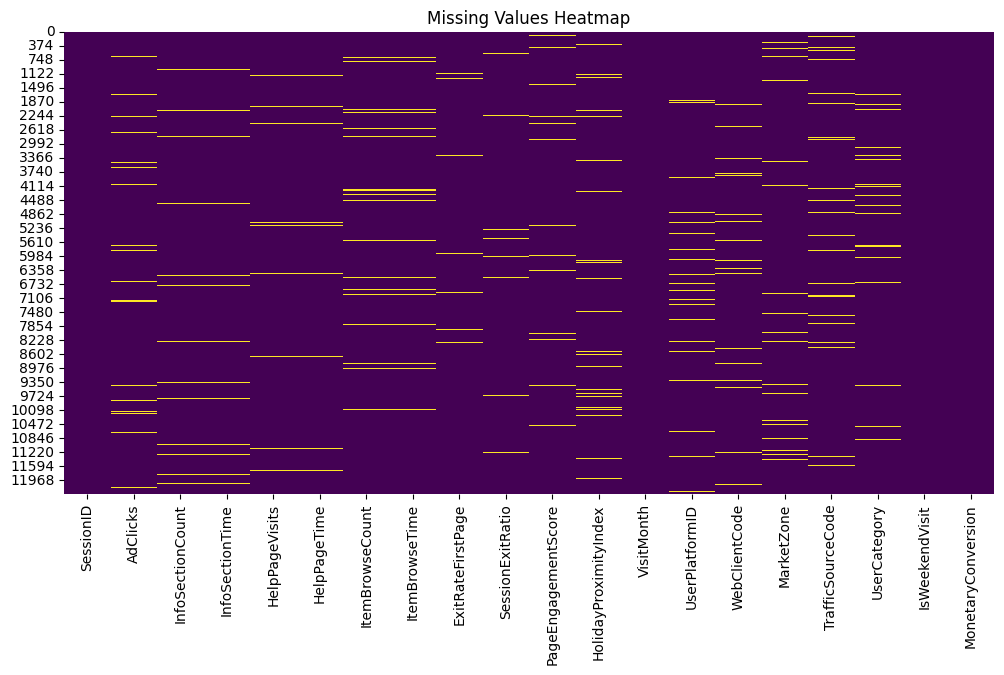

The heatmap visually represents missing data points (yellow/light color).


In [11]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()
print("The heatmap visually represents missing data points (yellow/light color).")

### **Data Type Conversion**

In [12]:
df['IsWeekendVisit'] = df['IsWeekendVisit'].astype(str).map({'True': 1, 'False': 0, 'No': 0, 'Yes': 1})
df['MonetaryConversion'] = df['MonetaryConversion'].astype(str).map({'Yes': 1, 'No': 0})

print("\nAfter converting boolean/categorical columns:")
df.info()


After converting boolean/categorical columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SessionID              12330 non-null  object 
 1   AdClicks               11467 non-null  float64
 2   InfoSectionCount       11961 non-null  float64
 3   InfoSectionTime        11961 non-null  float64
 4   HelpPageVisits         12084 non-null  float64
 5   HelpPageTime           12084 non-null  float64
 6   ItemBrowseCount        11837 non-null  float64
 7   ItemBrowseTime         11837 non-null  float64
 8   ExitRateFirstPage      12207 non-null  float64
 9   SessionExitRatio       12084 non-null  float64
 10  PageEngagementScore    11961 non-null  float64
 11  HolidayProximityIndex  11837 non-null  float64
 12  VisitMonth             12330 non-null  object 
 13  UserPlatformID         11837 non-null  object 
 14  WebClie

### **Separate numerical and categorical columns**

In [15]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()

print(f"Numerical Columns: {numerical_cols}")
print(f"Categorical Columns: {categorical_cols}")

Numerical Columns: ['AdClicks', 'InfoSectionCount', 'InfoSectionTime', 'HelpPageVisits', 'HelpPageTime', 'ItemBrowseCount', 'ItemBrowseTime', 'ExitRateFirstPage', 'SessionExitRatio', 'PageEngagementScore', 'HolidayProximityIndex', 'TrafficSourceCode', 'IsWeekendVisit', 'MonetaryConversion']
Categorical Columns: ['SessionID', 'VisitMonth', 'UserPlatformID', 'WebClientCode', 'MarketZone', 'UserCategory']


### **Visualize Numerical Columns**

#### **Histograms — to see data distribution**

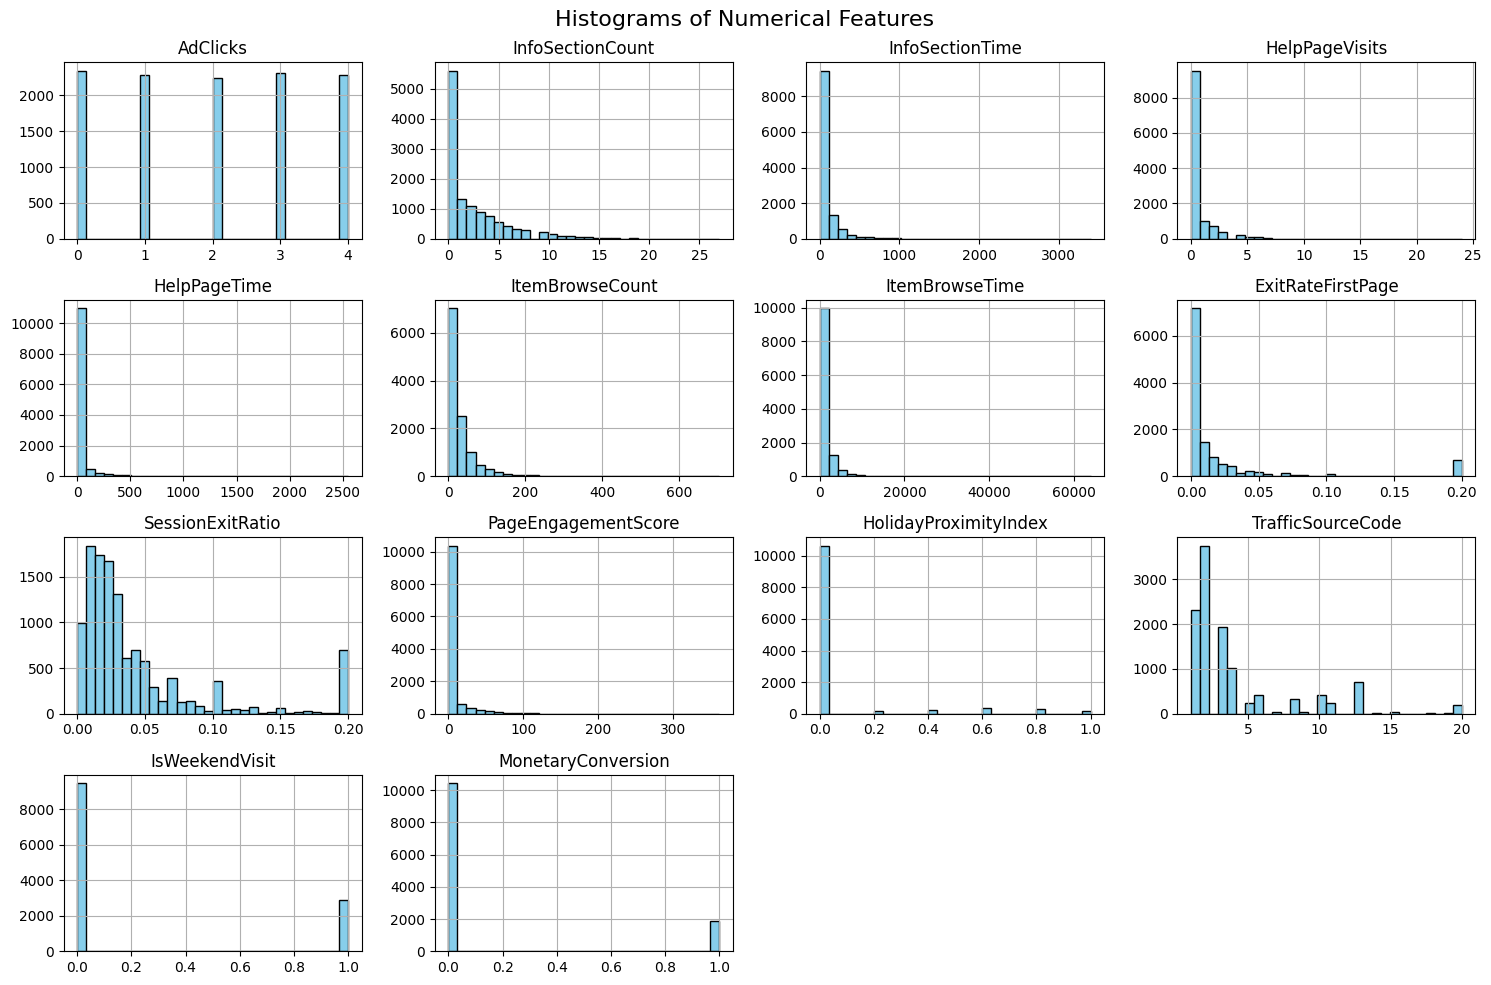

In [16]:
df[numerical_cols].hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

#### **Boxplots — to check for outliers**

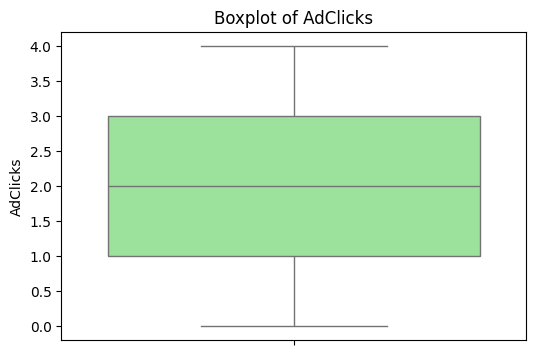

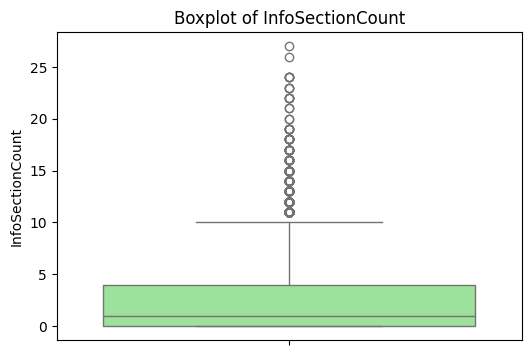

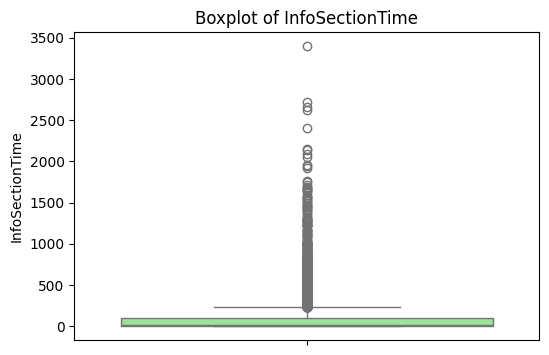

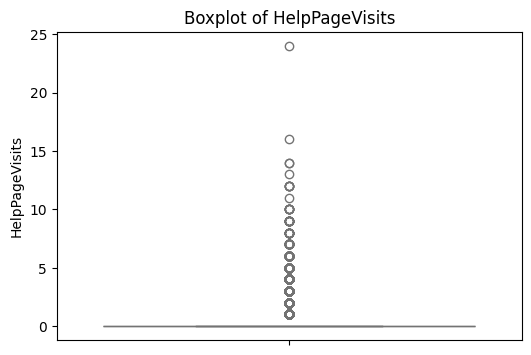

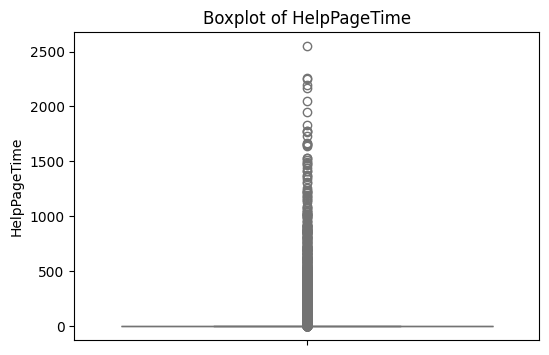

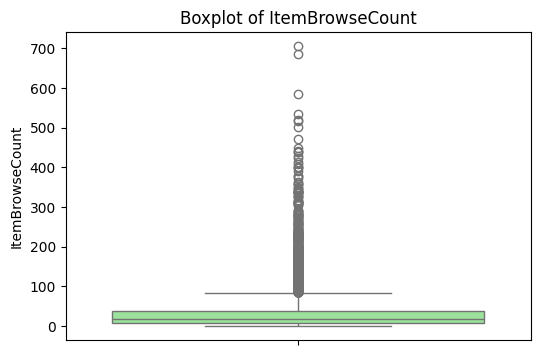

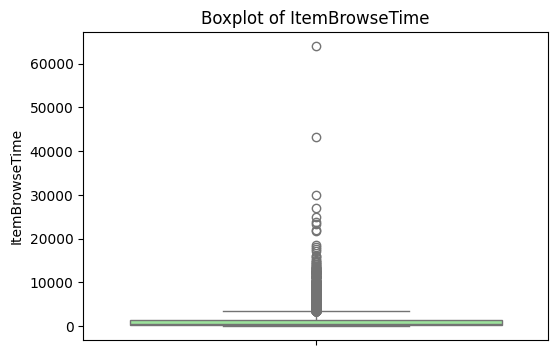

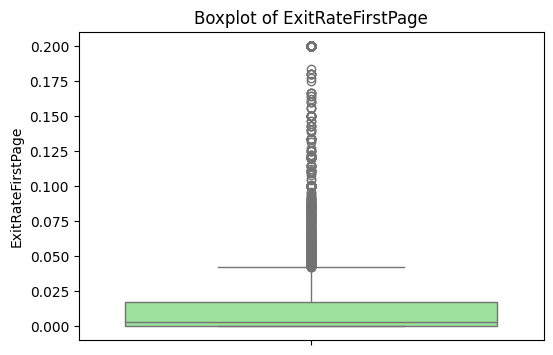

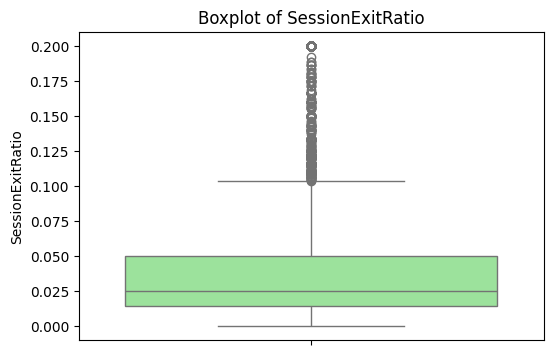

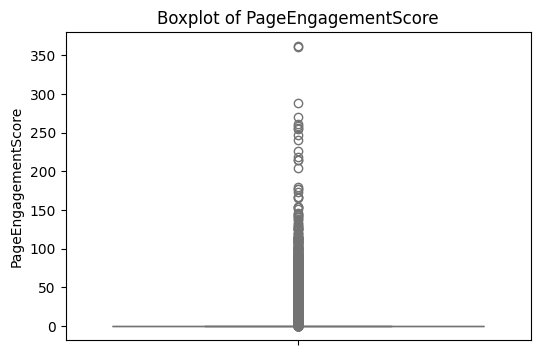

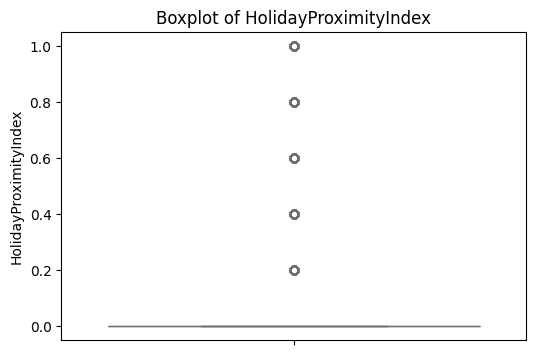

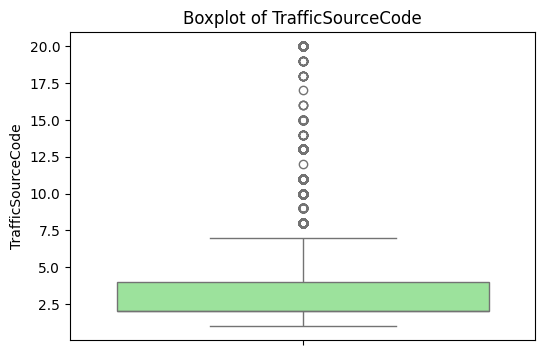

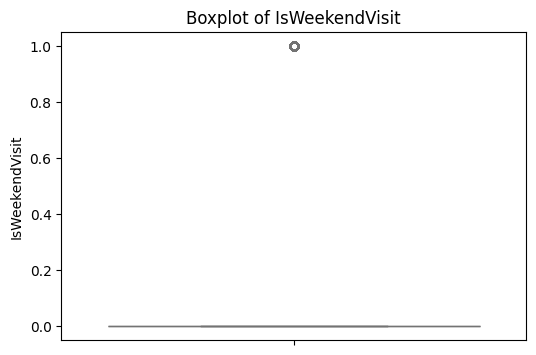

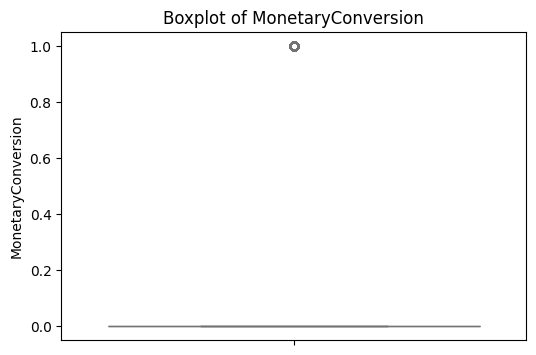

In [19]:
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col], color='lightgreen')
    plt.title(f"Boxplot of {col}")
    plt.ylabel(col)
    plt.show()

### **Correlation Matrix of Numerical Features**

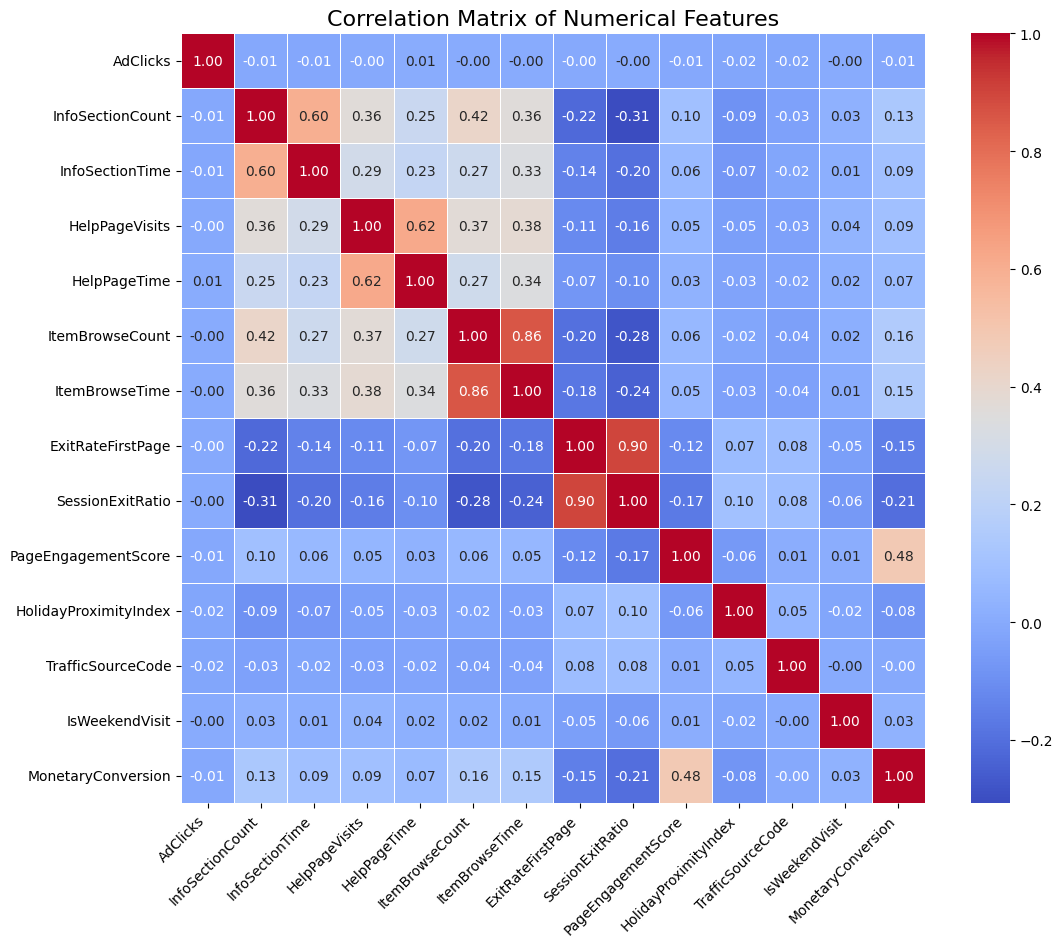

In [37]:
plt.figure(figsize=(12, 10))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

### **Data Cleaning Steps**

In [27]:
for col in ['AdClicks', 'InfoSectionCount', 'InfoSectionTime', 'HelpPageVisits', 'HelpPageTime','ItemBrowseCount', 'ItemBrowseTime', 'ExitRateFirstPage', 'SessionExitRatio','PageEngagementScore', 'HolidayProximityIndex']:
    if df[col].isnull().any():
        if 'Time' in col or 'Browse' in col:
            df[col].fillna(df[col].median(), inplace=True)
        else:
            df[col].fillna(df[col].mean(), inplace=True)
    print(f"Filled missing values in '{col}' with its median/mean.")

Filled missing values in 'AdClicks' with its median/mean.
Filled missing values in 'InfoSectionCount' with its median/mean.
Filled missing values in 'InfoSectionTime' with its median/mean.
Filled missing values in 'HelpPageVisits' with its median/mean.
Filled missing values in 'HelpPageTime' with its median/mean.
Filled missing values in 'ItemBrowseCount' with its median/mean.
Filled missing values in 'ItemBrowseTime' with its median/mean.
Filled missing values in 'ExitRateFirstPage' with its median/mean.
Filled missing values in 'SessionExitRatio' with its median/mean.
Filled missing values in 'PageEngagementScore' with its median/mean.
Filled missing values in 'HolidayProximityIndex' with its median/mean.


In [28]:
for col in ['VisitMonth', 'UserPlatformID', 'WebClientCode', 'MarketZone', 'TrafficSourceCode', 'UserCategory']:
    if df[col].isnull().any():
        df[col].fillna(df[col].mode()[0], inplace=True)
        print(f"Filled missing values in '{col}' with its mode.")

Filled missing values in 'UserPlatformID' with its mode.
Filled missing values in 'WebClientCode' with its mode.
Filled missing values in 'MarketZone' with its mode.
Filled missing values in 'TrafficSourceCode' with its mode.
Filled missing values in 'UserCategory' with its mode.


C:\Users\harsh\AppData\Local\Temp\ipykernel_2288\519232450.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


### **Re-check missing values after cleaning**

In [32]:
print("\nMissing values after initial cleaning:")
df.isnull().sum()[df.isnull().sum() > 0]


Missing values after initial cleaning:


Series([], dtype: int64)

In [ ]:
print("\nCleaned Data Info:")
df.info()


Cleaned Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SessionID              12330 non-null  object 
 1   AdClicks               12330 non-null  float64
 2   InfoSectionCount       12330 non-null  float64
 3   InfoSectionTime        12330 non-null  float64
 4   HelpPageVisits         12330 non-null  float64
 5   HelpPageTime           12330 non-null  float64
 6   ItemBrowseCount        12330 non-null  float64
 7   ItemBrowseTime         12330 non-null  float64
 8   ExitRateFirstPage      12330 non-null  float64
 9   SessionExitRatio       12330 non-null  float64
 10  PageEngagementScore    12330 non-null  float64
 11  HolidayProximityIndex  12330 non-null  float64
 12  VisitMonth             12330 non-null  object 
 13  UserPlatformID         12330 non-null  object 
 14  WebClientCode          12330 non-n

In [35]:
df.head()

,SessionID,AdClicks,InfoSectionCount,InfoSectionTime,HelpPageVisits,HelpPageTime,ItemBrowseCount,ItemBrowseTime,ExitRateFirstPage,SessionExitRatio,PageEngagementScore,HolidayProximityIndex,VisitMonth,UserPlatformID,WebClientCode,MarketZone,TrafficSourceCode,UserCategory,IsWeekendVisit,MonetaryConversion
0,jv3uDyqYltpoXreO,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.000000,February,Windows,Safari,North America,1.0,Returning,0,0
1,eBHG5YGyco8TRlac,4.0,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.000000,February,Android,Chrome,North America,2.0,Returning,0,0
2,Lz5fuqr91SKGHb5N,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.000000,February,MacOS,Safari,Other,3.0,Returning,0,0
3,cyOsumxkpNEvKIdc,4.0,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.000000,February,iOS,Chrome,Europe,4.0,Returning,0,0
4,F4rTMKOqtoPKzxw9,2.0,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.061806,February,iOS,Internet Explorer,North America,4.0,Returning,1,0


In [36]:
df.to_csv('../data/cleaned_session_data.csv', index=False)
print("\nCleaned data saved to 'cleaned_session_data.csv'")


Cleaned data saved to 'cleaned_session_data.csv'
